In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
# import catboost

In [57]:
# reading the file

properties = pd.read_csv('rentals.csv')
properties.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [58]:
# Dropping irrrelevant columns

properties = properties.drop('id', axis=1)

# dropping null values

properties = properties.dropna()

# Examining the new dataset
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8095 non-null   float64
 1   longitude       8095 non-null   float64
 2   property_type   8095 non-null   object 
 3   room_type       8095 non-null   object 
 4   bathrooms       8095 non-null   float64
 5   bedrooms        8095 non-null   float64
 6   minimum_nights  8095 non-null   int64  
 7   price           8095 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 569.2+ KB


In [59]:
# Looking for categorical columns in the object dtype
properties.nunique()

latitude          5053
longitude         5173
property_type       26
room_type            4
bathrooms           17
bedrooms            10
minimum_nights      53
price              526
dtype: int64

In [60]:
# Converting object dtype to categorical values
properties['property_type'] = properties.property_type.astype('category')
properties['room_type'] = properties.room_type.astype('category')

properties.head()


,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [61]:
# Cleaning the price column

properties['price'] = properties.price.str.replace('$', '', regex=True).str.replace(',', '',regex=True)
properties['price'] = pd.to_numeric(properties.price)
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        8095 non-null   float64 
 1   longitude       8095 non-null   float64 
 2   property_type   8095 non-null   category
 3   room_type       8095 non-null   category
 4   bathrooms       8095 non-null   float64 
 5   bedrooms        8095 non-null   float64 
 6   minimum_nights  8095 non-null   int64   
 7   price           8095 non-null   float64 
dtypes: category(2), float64(5), int64(1)
memory usage: 460.0 KB


In [62]:
# Encoding categorical values
properties2 = pd.get_dummies(properties, columns = ['property_type', 'room_type'])

In [63]:
# chooseing features and target variables

x = properties2.drop('price', axis=1)
y = properties2['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [64]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# print('R2 Squared score: ',lr.score(x_test,y_test))
# y_pred = lr.predict(x_test)
# print('Mean Squared Error: ', MSE(y_test,y_pred))
# print(lr.intercept_)

def linear_model(a,b,c,d):
    lr = LinearRegression()
    lr.fit(a,b)
    y_pred = lr.predict(c)
    Mean_error = MSE(d, y_pred)
    score = lr.score(c,d)
    RMSE = Mean_error * (1/2)
    coef = lr.coef_
    intercept = lr.intercept_
    g = f'MSE: {Mean_error}'
    h = f'R2 score: {score}'
    e = f'Coefficients: {coef}'
    f = f'Intercept: {intercept}'
    return e, f, g, h

linear_model(x_train,y_train,x_test,y_test)
    

('Coefficients: [ 1.33296328e+03  1.68880946e+02  4.84580096e+00  1.12685853e+02\n -3.48002957e-07 -7.09397426e+01 -6.60721889e+01 -1.20354464e+01\n  2.64084074e+02 -6.69990418e+01 -1.35098828e+02 -1.29723394e+02\n -4.15271906e+01 -3.35733005e+01 -7.34270904e+00 -1.91051957e+02\n  2.18611758e+02 -6.34157108e+01 -4.33046472e+01 -4.64177028e+01\n  1.28942531e+02 -4.71738725e+01 -8.86783945e+01  3.78503141e+01\n -9.66122821e-01 -3.35727464e+00  3.25645188e+02  7.58224636e+00\n -1.02783982e+02  2.97141511e+00  1.64773978e+02  9.86897828e+01\n -8.35749300e+01  3.21307007e+01 -4.72455535e+01]',
 'Intercept: -29625.8006096972',
 'MSE: 201179.0584503936',
 'R2 score: 0.09825696605152201')

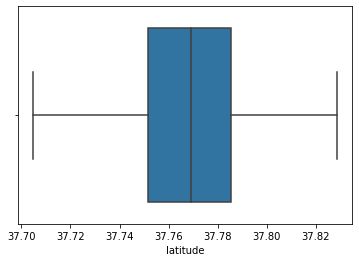

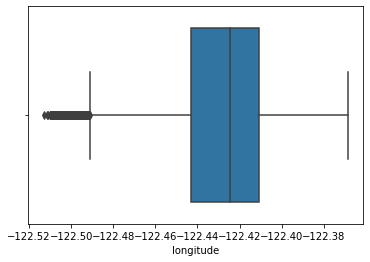

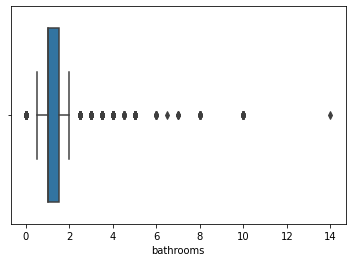

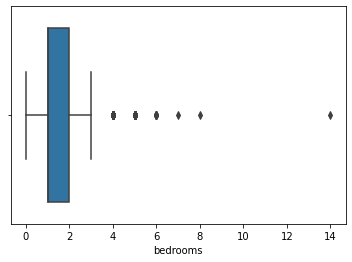

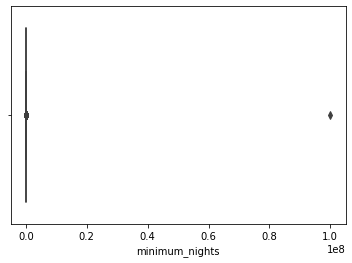

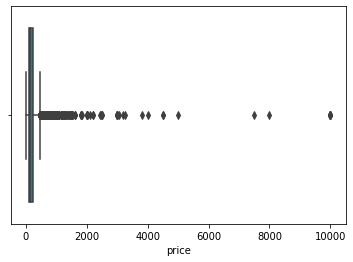

In [65]:
for i in properties.columns:
    if properties[f'{i}'].dtype != 'category':
            sns.boxplot(x=i, data=properties)
            plt.show()

In [66]:
night = properties[properties['minimum_nights'] >150].index

In [67]:
pric = properties[properties['price'] >500].index

In [68]:
bed = properties[properties['bedrooms'] >3].index

In [69]:
bath = properties[properties['bathrooms'] >3].index

In [70]:
# prop = properties[properties['bathrooms'] > properties['bedrooms']].index

In [71]:
prin = set(night).union(set(pric), set(bed), set(bath))
print(len(prin))

841


In [72]:
properties_filter = properties.drop(prin, axis=0)
properties_filter

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
6,37.75919,-122.42237,Condominium,Private room,1.0,1.0,1,139.0
7,37.76259,-122.40543,House,Private room,1.0,1.0,1,135.0
...,...,...,...,...,...,...,...,...
8105,37.70463,-122.46288,House,Private room,0.0,1.0,1,100.0
8107,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,200.0
8108,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,69.0
8109,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,187.0


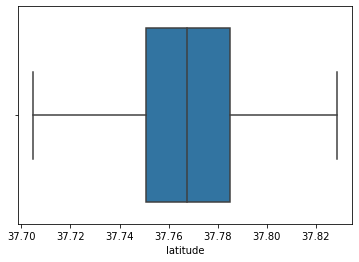

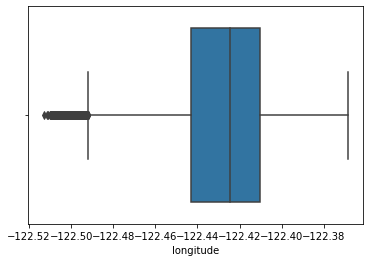

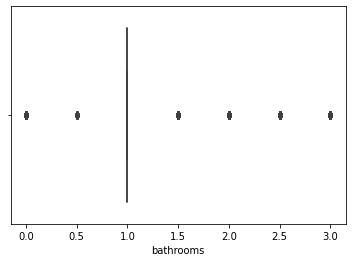

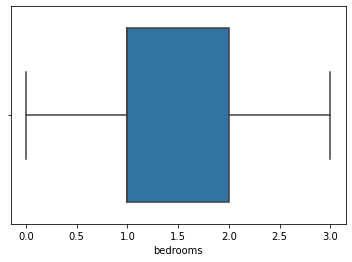

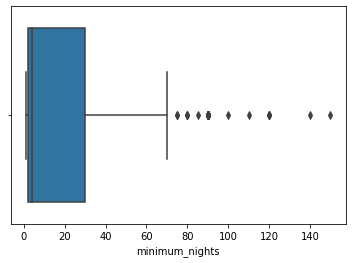

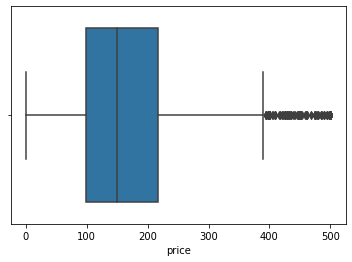

In [73]:
for ing in properties.columns:
    if properties[f'{ing}'].dtype != 'category':
            sns.boxplot(x=ing, data=properties_filter)
            plt.show()

In [74]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.180403,-0.012643,-0.139484,0.192738,0.156208
longitude,0.180403,1.000000,-0.034331,-0.115094,0.110133,0.063090
bathrooms,-0.012643,-0.034331,1.000000,0.450348,0.063238,0.261548
bedrooms,-0.139484,-0.115094,0.450348,1.000000,0.003202,0.504971
minimum_nights,0.192738,0.110133,0.063238,0.003202,1.000000,-0.138374
price,0.156208,0.063090,0.261548,0.504971,-0.138374,1.000000


In [75]:
properties.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187000,0.078469,-0.108647,-0.007415,0.083231
longitude,0.187000,1.000000,0.007627,-0.115893,0.002028,0.015867
bathrooms,0.078469,0.007627,1.000000,0.327916,-0.004766,0.081981
bedrooms,-0.108647,-0.115893,0.327916,1.000000,-0.004159,0.262343
minimum_nights,-0.007415,0.002028,-0.004766,-0.004159,1.000000,-0.004247
price,0.083231,0.015867,0.081981,0.262343,-0.004247,1.000000


In [76]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_21968\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.422105
longitude        -0.957425
bathrooms         1.790378
bedrooms          0.708931
minimum_nights    1.047505
price             1.167452
dtype: float64

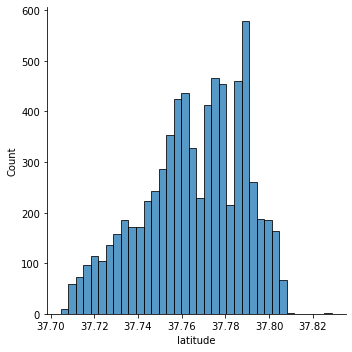

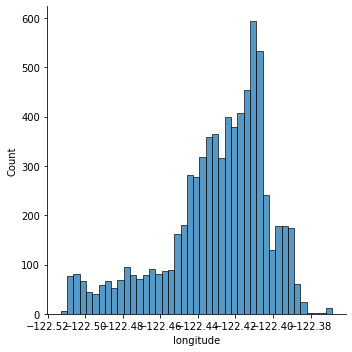

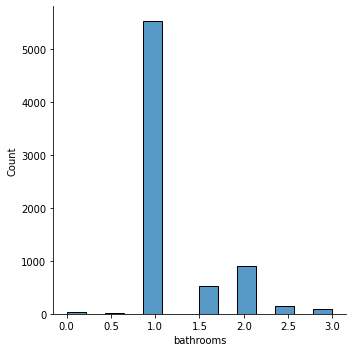

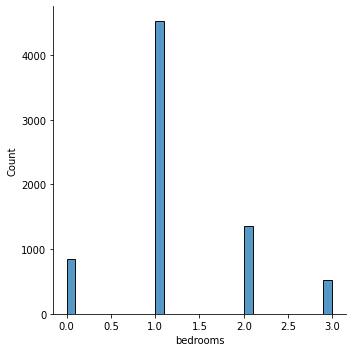

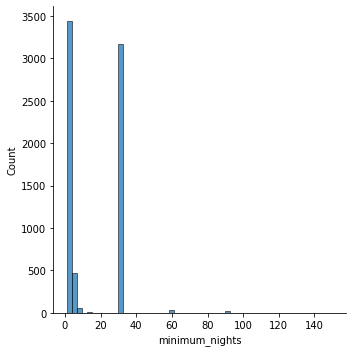

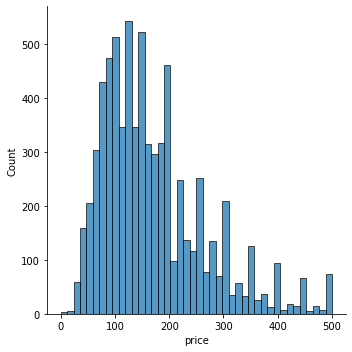

In [77]:
for dis in properties.columns:
    if properties[f'{dis}'].dtype != 'category':
        # if dis != 'minimum_nights':
            sns.displot(properties_filter[f'{dis}'])
            plt.show()

In [78]:
properties_filter[(properties_filter.bedrooms == 0) & (properties_filter.bathrooms==0)].head(60)

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [79]:
len(properties_filter[properties_filter.bathrooms == 0])

38

In [80]:
# 7022
properties_filter = properties_filter.drop(7022, axis=0)

In [81]:
log_target = np.log1p(properties_filter["price"])
log_target.skew()

-0.3031618290437542

In [82]:
# Removing nil prices value
properties_filter = properties_filter.drop(properties_filter[properties_filter.price <=0].index, axis=0)


-0.4236748575562939


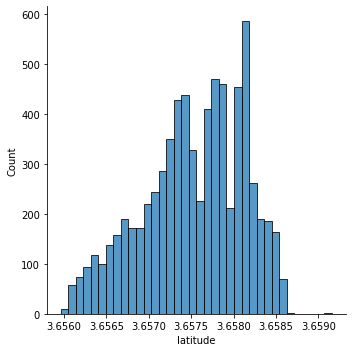

0.08126578358804372


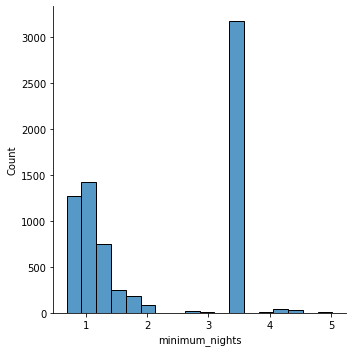

-0.21535285334114584


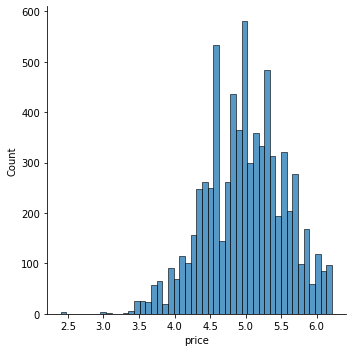

In [83]:
for trans in properties.columns:
    if properties[f'{trans}'].dtype != 'category':
        if trans == 'price' or trans == 'minimum_nights' or trans == 'latitude':
            properties_filter[f'{trans}'] = np.log1p(properties_filter[f'{trans}'])
            print(properties_filter[f'{trans}'].skew())
            sns.displot(properties_filter[f'{trans}'])
            plt.show()

0.47905698181999706


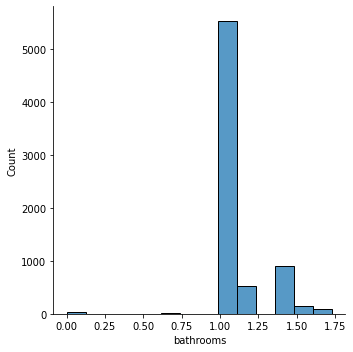

-1.0208269425538075


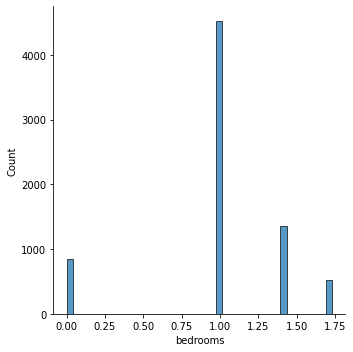

In [84]:
for trans2 in properties.columns:
    if properties[f'{trans2}'].dtype != 'category':
        if trans2 == 'bedrooms' or trans2 == 'bathrooms':
            properties_filter[f'{trans2}'] = properties_filter[f'{trans2}']**(1/2)
            print(properties_filter[f'{trans2}'].skew())
            sns.displot(properties_filter[f'{trans2}'])
            plt.show()

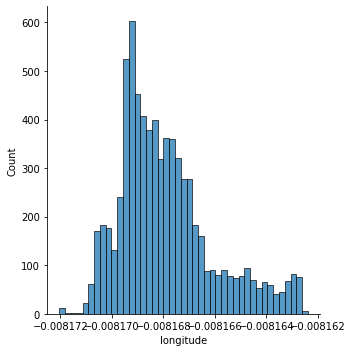

In [85]:
properties_filter['longitude'] = 1/properties_filter['longitude']
sns.displot(properties_filter['longitude'])

In [86]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_21968\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.423675
longitude         0.956062
bathrooms         0.479057
bedrooms         -1.020827
minimum_nights    0.081266
price            -0.215353
dtype: float64

In [87]:
properties_filter.skew()


C:\Users\Austin\AppData\Local\Temp\ipykernel_21968\2815464604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.423675
longitude         0.956062
bathrooms         0.479057
bedrooms         -1.020827
minimum_nights    0.081266
price            -0.215353
dtype: float64

In [88]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,-0.180470,-0.023074,-0.163406,0.200922,0.175555
longitude,-0.180470,1.000000,0.038778,0.128682,-0.120622,-0.078157
bathrooms,-0.023074,0.038778,1.000000,0.350655,0.073411,0.182198
bedrooms,-0.163406,0.128682,0.350655,1.000000,-0.007861,0.338091
minimum_nights,0.200922,-0.120622,0.073411,-0.007861,1.000000,-0.120626
price,0.175555,-0.078157,0.182198,0.338091,-0.120626,1.000000


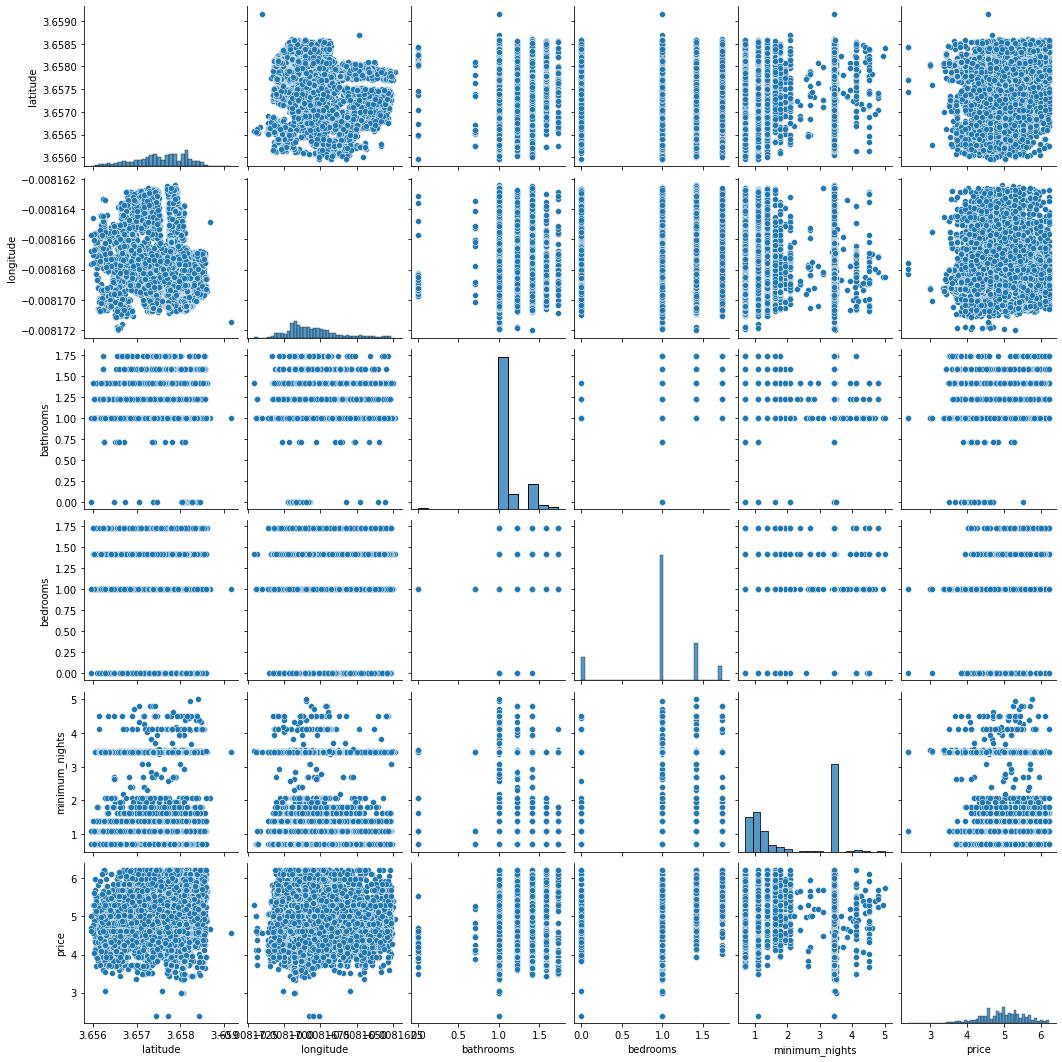

In [89]:
sns.pairplot(data=properties_filter)

In [90]:
# Encoding categorical values
properties_filter = pd.get_dummies(properties_filter, columns = ['property_type', 'room_type'])

In [91]:
# chooseing features and target variables

filter_x = properties_filter.drop('price', axis=1).values
filter_y = properties_filter['price'].values

filter_x_train, filter_x_test, filter_y_train, filter_y_test = train_test_split(filter_x, filter_y, test_size=0.2, random_state=42)
filter_x

array([[ 3.65762895, -0.00816768,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65723449, -0.00816606,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.65700455, -0.00816853,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.65672035, -0.00817066,  1.41421356, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.65794178, -0.00816913,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65602227, -0.00816672,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [92]:
linear_model(filter_x_train, filter_y_train, filter_x_test, filter_y_test)

('Coefficients: [ 1.82898837e+02 -2.44287075e+04  3.14115771e-01  3.82759914e-01\n -1.26282393e-01  8.35032510e-02  2.13369382e-02 -2.98870893e-02\n  4.28204844e-01 -7.62058706e-02 -3.87235978e-01 -1.65264383e+00\n -3.39567027e-01  1.18256995e-01  1.71025994e-01 -3.46700175e-01\n  8.87056988e-02 -7.54096676e-02 -2.37720465e-02 -2.70647957e-01\n  3.96867879e-01  4.44856387e-02 -1.46724191e-08  2.08592656e-01\n  2.30432732e-01  4.08477717e-01  9.20579909e-01 -3.89362458e-03\n -1.09557143e-02  2.83184170e-02  6.81295614e-02  6.81468902e-01\n  8.63274445e-03  8.82582931e-02 -7.78359870e-01]',
 'Intercept: -864.4162331013385',
 'MSE: 0.14826162113203745',
 'R2 score: 0.5264816095849068')

In [103]:
from sklearn.ensemble import RandomForestRegressor

fori = []

xw = np.arange(1,100,10)

for forest in xw:
    rfr = RandomForestRegressor(n_estimators=forest)
    rfr.fit(filter_x_train, filter_y_train)
    filter_pred = rfr.predict(filter_x_test)
    fori.append(MSE(filter_y_test, filter_pred))

fori

[0.17344077618104395,
 0.1165683244572692,
 0.11675211800169338,
 0.1145352269620781,
 0.11227467022037471,
 0.1122187670000111,
 0.11282032084997237,
 0.11198102723500389,
 0.11234147884272523,
 0.11106149088441068]

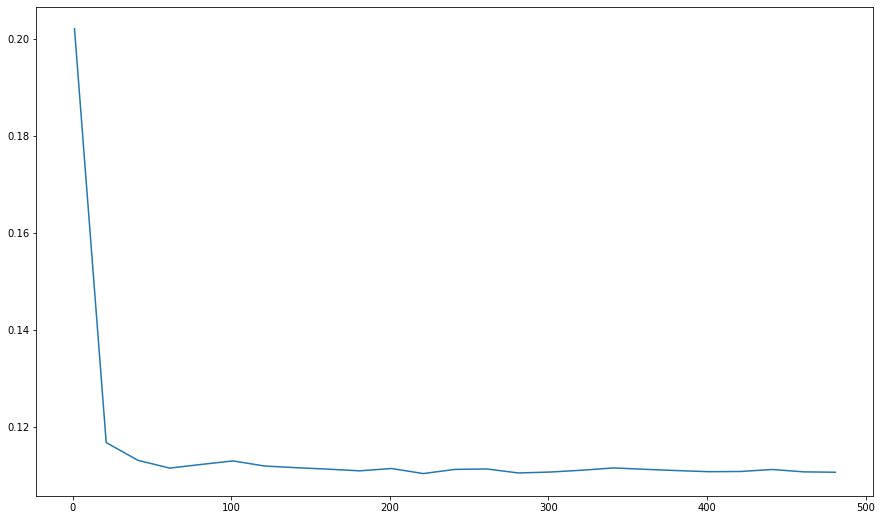

In [102]:
plt.figure(figsize=(15,9))
plt.plot(xw, fori)
plt.show()

In [104]:
rfr = RandomForestRegressor(n_estimators=481)
rfr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
MSE(filter_y_test, filter_pred)

0.1104870095368107

In [105]:
rfr.score(filter_x_test, filter_y_test)

0.6471262723408702